# <center> The Last Home Assignment</center> 

<img src='https://www.film.ru/sites/default/files/images/300-2006-01.jpg' width=500>
    
# <center> or <br> sample assignment to help you with a group project</center> 

#### Grading policy: 

Grade for Task 1 => grade for HA5 (max 10 points). <br>
Grade for Task 2 => grade for HA6 (max 13 points). <br>
Grade for Task 3 => grade for HA7 (max 10 points). <br>
Grade for Task 4 => grade for HA8 (max 13 points). <br>
Bonus task in the end [+ 5 points]<br>

This final homework assignment will be a quick example of your research / industry project. It only covers a small part of what you can do, but let's at least consolidate the knowledge you have and even learn new information on which graphs you can plot.

In [1]:
# in case if you didn't install this libraries on week 9 + bubbly
!pip install plotly-express
!pip install nbformat
!pip install plotly
!pip install bubbly

In [2]:
!pip install --upgrade nbformat

  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
from tqdm import tqdm
init_notebook_mode(connected=True)
%config InlineBackend.figure_format = 'svg'

Each project starts with statements of the purpose (goal), objectives, and the research hypotheses. 

The topic of our mini-research project will be **' The comparative analysis of the countries on the index of happiness'**.
The  **goal** - to compare key indicators reflecting the level of happiness of the population of different countries, and the dynamics of their change for 2015-2020. 

The **objectives**: 
* To gather the data for 2015-2020 on the happiness level indices. 
* To compare the descriptive statistics across the countries and time periods.
* To visualize the data in order to draw the additional conclusion for exploratory data analysis.
* To test the statistical hypotheses on differences between most distinct continents based on selected indicators. 

**Research hypothesis**: There is no significant difference in the level of happiness across different countries on average. 

**Task 1.** EDA.Part 1

In a given data set we observe the reported statistics on the happiness index across different countries. It covers 5 years: 2015 - 2019 years. 

You can find additional descriptions on context and content here: https://www.kaggle.com/unsdsn/world-happiness

Read file ```happiness_index.csv``` into a DataFrame using pandas. The columns:

* ```Country``` - Name of the country.

* ```Happiness Rank``` - Rank of the country based on the Happiness Score.

* ```Happiness Score``` - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* ```GDP``` - The extent to which GDP per capita contributes to the calculation of the Happiness Score.

* ```Life expectancy``` - The extent to which Life expectancy contributed to the calculation of the Happiness Score.

* ```Freedom``` - The extent to which Freedom contributed to the calculation of the Happiness Score.

* ```Trust``` - The extent to which Perception of Government Corruption contributes to Happiness Score.

1.  As far as not each country was recorded each year, you need to filter this table and leave only countries without missing recording for each year (2015, 2016, 2017, 2018, 2019).  *Hint*: you need to check first how many recordings there are for each country in a data set. For instance, think about how you can use the result of ```value_counts()``` and ```isin``` to write a condition for filtering. 

Write a conclusion about how many countries there were, how many of them you excluded from the analysis, and why.
Next tasks you need to complete with a filtered data set.

2. If you look at the table, you will notice that it is sorted by year and then by happiness rank. It would be easier to view all the records for each country and year at once so that you can track the evolution of the index over time. Sort this table by both country name and year. If you observe, after applying the ```.head(15)``` method, the beginning of the dataset with Afghanistan, Albania and Algeria for 2015-2019, that is correct.

In [4]:
data = pd.read_csv('happiness_index.csv')

In [5]:
# Task 1
prev_countries = set(data['Country'].unique())
data = data[data['Country'].apply(lambda x: data[data.Country == x]['Year'].value_counts().sum() == 5)]
current_countries = set(data['Country'].unique())

In [6]:
len(prev_countries),len(current_countries)

(170, 141)

**Conclusion:** Initially, there were 170 countries. After filtering, the table contains data on 141. 29 countries were excluded from the analysis. We left only those countries for which the table contained data for all 5 years.

In [9]:
data = data.sort_values(by=['Country','Year'])
data.head(15)

Country  Happiness Rank  Happiness Score  Year       GDP  \
152  Afghanistan             153            3.575  2015  0.319820   
311  Afghanistan             154            3.360  2016  0.382270   
455  Afghanistan             141            3.794  2017  0.401477   
614  Afghanistan             145            3.632  2018  0.332000   
779  Afghanistan             154            3.203  2019  0.350000   
94       Albania              95            4.959  2015  0.878670   
266      Albania             109            4.655  2016  0.955300   
423      Albania             109            4.644  2017  0.996193   
581      Albania             112            4.586  2018  0.916000   
732      Albania             107            4.719  2019  0.947000   
67       Algeria              68            5.605  2015  0.939290   
195      Algeria              38            6.355  2016  1.052660   
367      Algeria              53            5.872  2017  1.091864   
553      Algeria              84            5.295  2018  0.979000   
713      Algeria              88            5.211  2019  1.002000   

     Life Expectancy   Freedom     Trust  
152         0.303350  0.234140  0.097190  
311         0.173440  0.164300  0.071120  
455         0.180747  0.106180  0.061158  
614         0.255000  0.085000  0.036000  
779         0.361000  0.000000  0.025000  
94          0.813250  0.357330  0.064130  
266         0.730070  0.318660  0.053010  
423         0.731160  0.381499  0.039864  
581         0.790000  0.419000  0.032000  
732         0.874000  0.383000  0.027000  
67          0.617660  0.285790  0.173830  
195         0.618040  0.210060  0.161570  
367         0.617585  0.233336  0.146096  
553         0.687000  0.077000  0.135000  
713         0.785000  0.086000  0.114000

In [10]:
# Task 2

The below code calculates the difference between 2015 and 2019 happiness scores for each country.
Sort the dictionary by score difference (instead of sorting by country name) and select the 2 countries with the largest positive difference and the 2 countries with the largest negative score difference. Add these 4 countries and Russia to the ``` sample ``` variable - these countries will be our subset for further analysis.

Note, that this code will not work until you filter your data set and leave only the countries with the recordings for each out of 5 years. 

In [11]:
stata_dict = {}
for country in tqdm(data.Country.unique()):
    stata = data[data.Country == country]['Happiness Score']
    diff_2019_2015 = stata.iloc[4] - stata.iloc[0] 
    stata_dict[country] = diff_2019_2015

100%|██████████| 141/141 [00:00<00:00, 2827.34it/s]


In [12]:
a_countries = list(pd.DataFrame({"Country":stata_dict.keys(),"diff":stata_dict.values()}).sort_values(by = 'diff').Country)
#select countries for analysis from sort list
a_countries = a_countries[:2] + a_countries[-2:]
a_countries

['Venezuela', 'Zambia', 'Ivory Coast', 'Benin']

In [13]:
sample = ['Russia', 'Venezuela', 'Zambia', 'Ivory Coast', 'Benin']

Plot the pivot table with a code below and draw a conclusion on the differences among these countries in GDP per capita.

In [14]:
data[data.Country.isin(sample)].pivot_table(columns='Country', index='Year', values='GDP')

Country     Benin  Ivory Coast    Russia  Venezuela    Zambia
Year                                                         
2015     0.286650     0.465340  1.137640   1.044240  0.470380
2016     0.394990     0.555070  1.232280   1.133670  0.612020
2017     0.431085     0.603049  1.281778   1.128431  0.636407
2018     0.378000     0.541000  1.151000   0.996000  0.562000
2019     0.393000     0.569000  1.183000   0.960000  0.578000

**Conclusion:** Differences in GDP between countries persist over the years. This means that countries with low GDP do not overtake countries with higher GDP in this indicator, even in the best years.

What year was the most economically successful for these countries in 2015-2019?

In [15]:
data[data.Country.isin(sample)].pivot_table(columns='Country', index='Year', values='GDP').sum(1)

Year
2015    3.40425
2016    3.92803
2017    4.08075
2018    3.62800
2019    3.68300
dtype: float64

**Conclusion**: 2017 was the most economically successful year for these countries

**Task 2.** EDA. Part 2: plots

Let's make some plots to visualize the data. Run the code below and interpret the graph.

In [16]:
df = data[data.Country.isin(sample)].groupby(['Year','Country'], as_index=False)['Happiness Score'].sum()
px.line(df, 
        title='The dynamics of Happiness Score',
        x='Year', 
        y='Happiness Score', 
        color='Country')

* What is the name of this type of graph?
* In which countries in your sample are there positive and negative trends? 
* What does this mean in terms of the happiness index? 
* [bonus 1 point] Recall or try to find out what events in these countries can positively affect the happiness index?

1) This graph is a line chart.

2) Positive trends in Benin and Ivory Coast, negative in Venezuela and Zambia.

3) This means that in countries with a positive trend, people feel happier over the years. Conversely, when in countries with a negative trend, people feel less happy over time.

Take a look at histograms and scatter charts for key indicators across the entire dataset.

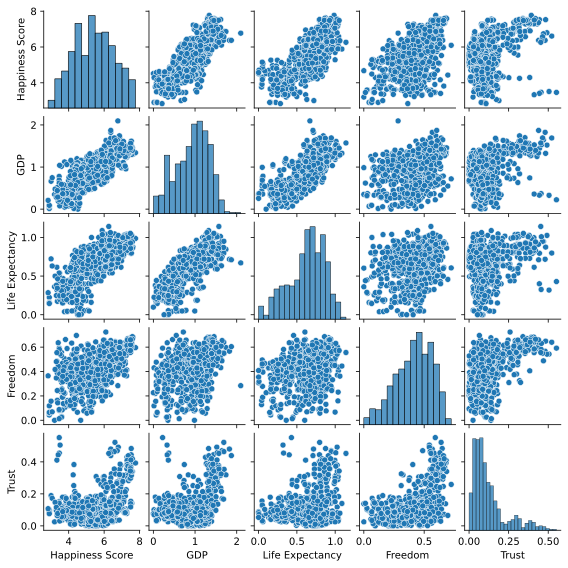

In [17]:
sns.pairplot(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust']], height=1.6);

* What kind of distributions are for each variable (or groups of variables)?
* Are there any linear trends in the interrelations between Happiness Score in a pair with other variables (according to the scatter plots)?

1) Distributions of variables happiness score, GDP, Life Expectancy, Freedom are similar to normal, trust is lognormal.

2) According to the scatter plots, there is a positive linear relationship between the happiness index and GDP and Life Expectancy.


Let's check your assumptions on linear trend and compute the correlation matrix. Run the code below. 

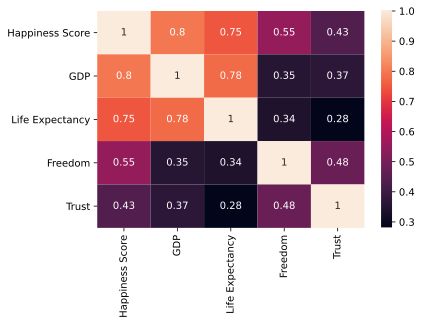

In [18]:
sns.heatmap(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust',  
                  'Country']].corr(), annot=True);

* Which variables are strongly correlated? Pick top 3 of them. 
* [bonus 1 point] Can you support by any evidence that exists there exists not only correlation, but causality between each of these 3 pairs of variables? 

1) Strong correlation between Happiness Score and GDP, Happiness Score and Life Expectancy, Life Expectancy and GDP.

Look at the correlation matrix on the basis of your sample countries (run the code):

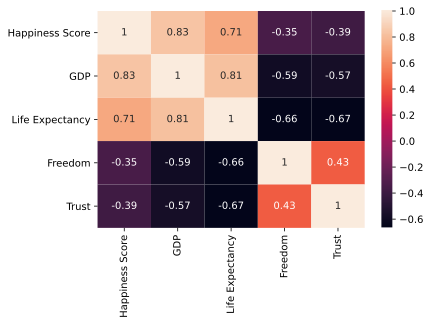

In [19]:
sns.heatmap(data[data.Country.isin(sample)][['Happiness Score', 
                                             'GDP',
                                             'Life Expectancy', 
                                             'Freedom',
                                             'Trust', 
                                             'Country']].corr(), annot=True);

* Compare the correlation matrices above. What values differ the most?
* Which matrix do you think is more reliable for inferring the general relationship between pairs of these variables? Why?
* Interpret the changes in the variables with the greatest negative correlation if the unit value changes by 1 unit.

1) The strongest differences are in the correlations in these matrices for the variables - Trust and Freedom

2) A matrix based on data for all countries is more reliable for assessing general relationships because it covers more examples and reflects general relationships in the world, rather than on a group of specially selected countries.

3) With an increase in a variable by one, with a negative correlation, another variable decreases by about 0.67, or vice versa, a decrease - an increase

Let's make a new variable ```Happiness Level```, which will include the level of happiness: low, medium or high. 

In [20]:
data['Happiness Level'] = pd.cut(data['Happiness Score'], 3, labels=["low", "medium", "high"])

Interpret the plot below in your own words:

In [21]:
sns.pairplot(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust', 
                  'Happiness Level']], 
             height=1.6, 
             hue="Happiness Level");

1) With low GDP and even high freedom, there is a low level of happiness

2) There is no difference in low and medium levels of happiness if the trust variable is less than 0.2 for the variables GDP, Life Expectancy,Freedom

Let's use an additional dataset of population size for each year and country and look at the dynamics of change. 

In [22]:
from bubbly.bubbly import bubbleplot 

gapminder = pd.read_csv('gapminder.tsv', delimiter='\t')

figure = bubbleplot(dataset=gapminder, 
                    x_column='gdpPercap', 
                    y_column='lifeExp', 
                    bubble_column='country', 
                    time_column='year', 
                    size_column='pop', #population
                    color_column='continent', 
                    x_title="GDP per Capita", 
                    y_title="Life Expectancy", 
                    title='Gapminder Global Indicators',
                    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

Please, interpret the results and what kind of conclusions you can add into your analysis. 

***Conclusions:***
1) Over the years, GDP, life expectancy and populations in Asia are growing.

2) In America and Europe, the population remains the same, but GDP and life expectancy are growing.

3) Over time, the lag in the GDP of African countries becomes stronger.

Run the code:

In [23]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
continents_population = dict(gapminder[gapminder.year == 2007].groupby('continent')['pop'].agg('sum'))
labels = [x for x in continents_population]

fig.add_trace(go.Pie(labels=labels, pull=[0, 0, 0, 0, 0.1], 
                     values=[value for key, value in continents_population.items()], 
                     name="Ratio"), 1, 1)
fig.update_layout(
    title_text="Ratio of population across differentcontinents",
    colorway=['rgb(69, 135, 24)', 'rgb(136, 204, 41)', 'rgb(204, 204, 41)', 
              'rgb(235, 210, 26)', 'rgb(209, 156, 42)'])
fig.show()

* What is the kind of this graph?
* What are the ratios for the continents?

1) This is circle chart.

2) 1/3 for Asia population, 1/6 for Africa and Americas, 1/10 for Europe and less than one percent for Oceania

Change the title and the labels of x and y-axes on this plot correctly: 

In [24]:
figure = bubbleplot(dataset=data, 
                    x_column='Happiness Score', 
                    y_column='GDP', 
                    bubble_column='Country', 
                    time_column='Year', 
                    color_column='Happiness Level', 
                    x_title="Happiness Score", 
                    y_title="GDP", 
                    title='Dependence of GDP and the level of happiness',
                    scale_bubble=1.5)

iplot(figure, config={'scrollzoom': True})

**Task 3.** Web parsing and scraping.

It is reasonable to note that we can search for up-to-date information for 2020 and supplement the data.

Follow the link and find a report for 2020 there: https://en.wikipedia.org/wiki/World_Happiness_Report 

In [25]:
import requests
from bs4 import BeautifulSoup

You already know this function from our Week 9 pratical class, but pay your attention to a new line:

```python3
df = pd.read_html(str(content))[0]
```

It converts our structured document tree with HTML tags into a DataFrame. 

On a provided Wiki page, find an HTML tag using Developer Tools, which is for the table with results on the 2020 year, and replace it instead of ```'HTML TAG HERE'```. 

In [26]:
def download_table_from_page():
    url = 'https://en.wikipedia.org/wiki/World_Happiness_Report'
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    # find the first matching table for this pattern
    content = tree.find('table', {'class' : 'wikitable sortable'})
    # convert structured html doc into a DataFrame
    df = pd.read_html(str(content))[0]
    
    return df

download_table_from_page()

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.809           1.285   
1               2                   Denmark  7.646           1.327   
2               3               Switzerland  7.560           1.391   
3               4                   Iceland  7.504           1.327   
4               5                    Norway  7.488           1.424   
..            ...                       ...    ...             ...   
148           149  Central African Republic  3.476           0.041   
149           150                    Rwanda  3.312           0.343   
150           151                  Zimbabwe  3.299           0.426   
151           152               South Sudan  2.817           0.289   
152           153               Afghanistan  2.567           0.301   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.500                    0.961                         0.662   
1             1.503                    0.979                         0.665   
2             1.472                    1.041                         0.629   
3             1.548                    1.001                         0.662   
4             1.495                    1.008                         0.670   
..              ...                      ...                           ...   
148           0.000                    0.000                         0.293   
149           0.523                    0.572                         0.604   
150           1.048                    0.375                         0.377   
151           0.553                    0.209                         0.066   
152           0.356                    0.266                         0.000   

     Generosity  Perceptions of corruption  
0         0.160                      0.478  
1         0.243                      0.495  
2         0.269                      0.408  
3         0.362                      0.145  
4         0.288                      0.434  
..          ...                        ...  
148       0.254                      0.028  
149       0.236                      0.486  
150       0.151                      0.081  
151       0.210                      0.111  
152       0.135                      0.001  

[153 rows x 9 columns]

So, it will be nice to join the report on the 2020 year with the reports on 2015-2019 in order to have a full data set for your analysis.
However, there are at least three problems:
1) The names of the columns differ
2) The content of columns differs
3) Some needed columns are missing, for instance, with a year. 

We will do the tasks to cope with it. 

1. Compare the columns from the data set on 2020 and data on 2015-2019. Rename the selected columns in place in a data set 2020 to the way they named for data 2015-2019: Overall rank => Happiness Rank, Country or region => Country, Score => Happiness Score, etc. till the end. Note, that you should rename only the columns which are present in both tables and differ in names (for example, Social support should not be included in rename method, because Social support is present only in the report 2020). 

2. Create a column Year and fill it with 2020 values for each row. There are several possible ways how you can do it, try to find out the easiest one. 

3. The code is provided for this task. Concatenate two data sets. Drop the extra column Social support. 

4. Check the missing values. For the column, Happiness Level fill in the missing values according to the value of Happiness Score (see a method ```pd.cut()``` used above). 

In [27]:
data_2020 = download_table_from_page()

#YOUR CODE HERE

In [28]:
data_2020.head(10)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.809           1.285           1.500   
1             2           Denmark  7.646           1.327           1.503   
2             3       Switzerland  7.560           1.391           1.472   
3             4           Iceland  7.504           1.327           1.548   
4             5            Norway  7.488           1.424           1.495   
5             6       Netherlands  7.449           1.339           1.464   
6             7            Sweden  7.353           1.322           1.433   
7             8       New Zealand  7.300           1.242           1.487   
8             9           Austria  7.294           1.317           1.437   
9            10        Luxembourg  7.238           1.537           1.388   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.961                         0.662       0.160   
1                    0.979                         0.665       0.243   
2                    1.041                         0.629       0.269   
3                    1.001                         0.662       0.362   
4                    1.008                         0.670       0.288   
5                    0.976                         0.614       0.336   
6                    0.986                         0.650       0.273   
7                    1.008                         0.647       0.326   
8                    1.001                         0.603       0.256   
9                    0.986                         0.610       0.196   

   Perceptions of corruption  
0                      0.478  
1                      0.495  
2                      0.408  
3                      0.145  
4                      0.434  
5                      0.369  
6                      0.442  
7                      0.461  
8                      0.281  
9                      0.367

In [29]:
# Task 1

In [30]:
columns = list(data_2020.columns)
columns

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [31]:
data.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Year', 'GDP',
       'Life Expectancy', 'Freedom', 'Trust', 'Happiness Level'],
      dtype='object')

In [32]:
columns[0] = 'Happiness Rank'
columns[1] = 'Country'
columns[2] ='Happiness Score'
columns[3] ='GDP'
columns[5] ='Life Expectancy'
columns[6] = 'Freedom'
columns[8] = 'Trust'

In [33]:
data_2020.columns = columns

In [34]:
data_2020.head(10)

Happiness Rank      Country  Happiness Score    GDP  Social support  \
0               1      Finland            7.809  1.285           1.500   
1               2      Denmark            7.646  1.327           1.503   
2               3  Switzerland            7.560  1.391           1.472   
3               4      Iceland            7.504  1.327           1.548   
4               5       Norway            7.488  1.424           1.495   
5               6  Netherlands            7.449  1.339           1.464   
6               7       Sweden            7.353  1.322           1.433   
7               8  New Zealand            7.300  1.242           1.487   
8               9      Austria            7.294  1.317           1.437   
9              10   Luxembourg            7.238  1.537           1.388   

   Life Expectancy  Freedom  Generosity  Trust  
0            0.961    0.662       0.160  0.478  
1            0.979    0.665       0.243  0.495  
2            1.041    0.629       0.269  0.408  
3            1.001    0.662       0.362  0.145  
4            1.008    0.670       0.288  0.434  
5            0.976    0.614       0.336  0.369  
6            0.986    0.650       0.273  0.442  
7            1.008    0.647       0.326  0.461  
8            1.001    0.603       0.256  0.281  
9            0.986    0.610       0.196  0.367

In [35]:
# Task 2

In [36]:
data_2020['Year'] = [2020]*len(data_2020)

In [37]:
data_2020.head(5)

Happiness Rank      Country  Happiness Score    GDP  Social support  \
0               1      Finland            7.809  1.285           1.500   
1               2      Denmark            7.646  1.327           1.503   
2               3  Switzerland            7.560  1.391           1.472   
3               4      Iceland            7.504  1.327           1.548   
4               5       Norway            7.488  1.424           1.495   

   Life Expectancy  Freedom  Generosity  Trust  Year  
0            0.961    0.662       0.160  0.478  2020  
1            0.979    0.665       0.243  0.495  2020  
2            1.041    0.629       0.269  0.408  2020  
3            1.001    0.662       0.362  0.145  2020  
4            1.008    0.670       0.288  0.434  2020

In [38]:
# Task 3
new_df = pd.concat([data, data_2020])
new_df.drop(columns=['Social support'], inplace=True)

In [39]:
# Task 4

In [40]:
new_df[new_df.drop(columns=['Generosity'],inplace = False).isnull().any(1)]

Country  Happiness Rank  Happiness Score  Year    GDP  \
489      United Arab Emirates              20            6.774  2018  2.096   
0                     Finland               1            7.809  2020  1.285   
1                     Denmark               2            7.646  2020  1.327   
2                 Switzerland               3            7.560  2020  1.391   
3                     Iceland               4            7.504  2020  1.327   
..                        ...             ...              ...   ...    ...   
148  Central African Republic             149            3.476  2020  0.041   
149                    Rwanda             150            3.312  2020  0.343   
150                  Zimbabwe             151            3.299  2020  0.426   
151               South Sudan             152            2.817  2020  0.289   
152               Afghanistan             153            2.567  2020  0.301   

     Life Expectancy  Freedom  Trust Happiness Level  Generosity  
489            0.670    0.284    NaN            high         NaN  
0              0.961    0.662  0.478             NaN       0.160  
1              0.979    0.665  0.495             NaN       0.243  
2              1.041    0.629  0.408             NaN       0.269  
3              1.001    0.662  0.145             NaN       0.362  
..               ...      ...    ...             ...         ...  
148            0.000    0.293  0.028             NaN       0.254  
149            0.572    0.604  0.486             NaN       0.236  
150            0.375    0.377  0.081             NaN       0.151  
151            0.209    0.066  0.111             NaN       0.210  
152            0.266    0.000  0.001             NaN       0.135  

[154 rows x 10 columns]

In [41]:
new_df['Happiness Level'] = pd.cut(new_df['Happiness Score'], 3, labels=["low", "medium", "high"])

Now, we are going to use this updated data set on Happiness Index 2015 - 2020 years in the last task. Are you happy with this fact? :)

**Task 4.** Test the Hypotheses.


1. Compute the 95% confidence interval for the Happiness Score for the 2020 year across all given countries. Draw the conclusions about the average happiness score of the entire population (of all existing countries) that can be made. 

*Bonus task [3 points]: make 95% confidence intervals for the Happiness Score for each year. Compare the confidence intervals, do they differ too much? What we can conclude concerning the changes in the average score of happiness in time? 

2. Check the hypothesis that there is no difference between Africa and Europe in the average Happiness Score. 

3. Check the hypothesis that there is no difference between Africa and Europe inv the variance of the Happiness Score. 

*Bonus task [5 points]
Write a general conclusion in 7-10 sentences from the analysis and data visualization results above. Also, try to answer the questions:
* Are we rejecting the original research hypothesis of this project?
* What information is missing to deepen this research project? What data and from what sources will you use?
* Have a glance at the official report https://worldhappiness.report/ed/2020/. Which arguments from the report can be supported by the statistics and plots from your analysis? 

In [42]:
!pip install statsmodels

In [43]:
new_df.head(5)

Country  Happiness Rank  Happiness Score  Year       GDP  \
152  Afghanistan             153            3.575  2015  0.319820   
311  Afghanistan             154            3.360  2016  0.382270   
455  Afghanistan             141            3.794  2017  0.401477   
614  Afghanistan             145            3.632  2018  0.332000   
779  Afghanistan             154            3.203  2019  0.350000   

     Life Expectancy  Freedom     Trust Happiness Level  Generosity  
152         0.303350  0.23414  0.097190             low         NaN  
311         0.173440  0.16430  0.071120             low         NaN  
455         0.180747  0.10618  0.061158             low         NaN  
614         0.255000  0.08500  0.036000             low         NaN  
779         0.361000  0.00000  0.025000             low         NaN

In [44]:
from statsmodels.stats.weightstats import _tconfint_generic
import numpy as np

In [45]:
happiness_score_conf_int = _tconfint_generic(new_df['Happiness Score'].mean(),
                                            new_df['Happiness Score'].std(ddof=1)/np.sqrt(len(new_df)),
                                            len(new_df) - 1,
                                            0.05,
                                            'two-sided')

In [46]:
happiness_score_conf_int

(5.360378293628956, 5.511246413897573)

***Conclusion:*** 
The average score of happiness for the entire population lie from 5.36 to 5.51 with a confidence level of 95%

In [47]:
years = list(new_df.Year.unique())
for y in years:
    happiness_score_conf_int = _tconfint_generic(new_df[new_df.Year == y]['Happiness Score'].mean(),
                                            new_df[new_df.Year == y]['Happiness Score'].std(ddof=1)/np.sqrt(len(new_df[new_df.Year == y])),
                                            len(new_df[new_df.Year == y]) - 1,
                                            0.05,
                                            'two-sided')
    print("95% confidence interval for Happiness Score in {} year from {} to {}".format(y,happiness_score_conf_int[0],happiness_score_conf_int[1]))

95% confidence interval for Happiness Score in 2015 year from 5.211939740602838 to 5.601492883510635
95% confidence interval for Happiness Score in 2016 year from 5.2047911336879515 to 5.590981915957441
95% confidence interval for Happiness Score in 2017 year from 5.221368732190316 to 5.595212821410887
95% confidence interval for Happiness Score in 2018 year from 5.255324910288234 to 5.624987146449351
95% confidence interval for Happiness Score in 2019 year from 5.302884713681561 to 5.667881243765251
95% confidence interval for Happiness Score in 2020 year from 5.295594327793189 to 5.650915476128379


Conclusion: The intervals do not differ very much. It can be concluded that, in general, the score of happiness has not changed over the years.

In [48]:
import scipy
from scipy.stats import ttest_ind

In [49]:
new_df.head(5)

Country  Happiness Rank  Happiness Score  Year       GDP  \
152  Afghanistan             153            3.575  2015  0.319820   
311  Afghanistan             154            3.360  2016  0.382270   
455  Afghanistan             141            3.794  2017  0.401477   
614  Afghanistan             145            3.632  2018  0.332000   
779  Afghanistan             154            3.203  2019  0.350000   

     Life Expectancy  Freedom     Trust Happiness Level  Generosity  
152         0.303350  0.23414  0.097190             low         NaN  
311         0.173440  0.16430  0.071120             low         NaN  
455         0.180747  0.10618  0.061158             low         NaN  
614         0.255000  0.08500  0.036000             low         NaN  
779         0.361000  0.00000  0.025000             low         NaN

In [50]:
gapminder.head(10)

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351

In [51]:
def get_continent(x):
    d = gapminder[gapminder.country == x].continent.values
    if len(d) == 0 :return None
    else :return d[0]

In [52]:
new_df['Continent'] = new_df['Country'].apply(lambda x: get_continent(x))

In [53]:
new_df.head(5)

Country  Happiness Rank  Happiness Score  Year       GDP  \
152  Afghanistan             153            3.575  2015  0.319820   
311  Afghanistan             154            3.360  2016  0.382270   
455  Afghanistan             141            3.794  2017  0.401477   
614  Afghanistan             145            3.632  2018  0.332000   
779  Afghanistan             154            3.203  2019  0.350000   

     Life Expectancy  Freedom     Trust Happiness Level  Generosity Continent  
152         0.303350  0.23414  0.097190             low         NaN      Asia  
311         0.173440  0.16430  0.071120             low         NaN      Asia  
455         0.180747  0.10618  0.061158             low         NaN      Asia  
614         0.255000  0.08500  0.036000             low         NaN      Asia  
779         0.361000  0.00000  0.025000             low         NaN      Asia

In [54]:
ttest_ind(new_df[new_df.Continent == "Africa"]['Happiness Score'],new_df[new_df.Continent == "Europe"]['Happiness Score'])

Ttest_indResult(statistic=-23.490924558863078, pvalue=8.14146483183961e-76)

***Conclusion:*** p-value is less than 0.05 so the hypothesis of equality of means is rejected. There are significant differences in scores of happiness in Africa and Europe

In [55]:
f = np.var(new_df[new_df.Continent == "Africa"]['Happiness Score'].values, ddof=1)/np.var(new_df[new_df.Continent == "Europe"]['Happiness Score'].values, ddof=1) #calculate F test statistic 
dfn = len(new_df[new_df.Continent == "Africa"]['Happiness Score'].values)-1 
dfd = len(new_df[new_df.Continent == "Europe"]['Happiness Score'].values)-1 
p = scipy.stats.f.cdf(f, dfn, dfd) 
print("p-value = {}".format(p))

p-value = 1.3968530011444026e-06


***Conclusion:*** p-value is less than 0.05 so the hypothesis of equality of variance is rejected. There are significant differences in variance of happiness in Africa and Europe

## Conclusion

The original hypothesis that there is no significant difference in the level of happiness is rejected.

There is a lack of data on the financial situation of people in countries, which can have an impact on life expectancy and the feeling of being a happy person in general.

I am in search of new data for this idea.

It might also be worth exploring how unemployment affects happiness.

The conclusions from the article on the relationship between GDP, life expectancy and trust are consistent with the constructed graphs, which reflect their linear relationship with the level of happiness.